# Machine Learning Assignment 2
## Bank Customer Churn Prediction

### Phase 1: Import Required Libraries

In this phase, we import all the necessary libraries required for:
- Data preprocessing
- Machine learning model implementation
- Model evaluation
- Model saving for deployment


In [3]:
# ================================
# Data Handling Libraries
# ================================
import pandas as pd
import numpy as np

# ================================
# Data Visualization (Optional but useful)
# ================================
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# Machine Learning Models
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# XGBoost Model
from xgboost import XGBClassifier

# ================================
# Model Evaluation Metrics
# ================================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)

# ================================
# Data Splitting & Preprocessing
# ================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ================================
# Model Saving
# ================================
import joblib


## Phase 2: Dataset Loading

In this phase, we load the selected dataset for the classification task.

Dataset Used:
**Bank Customer Churn Prediction Dataset (Kaggle)**

Steps performed:
- Load dataset using pandas
- Display first few rows
- Check dataset dimensions
- Inspect column names and data types

This helps in understanding the dataset before preprocessing.


In [4]:
# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

# Display first 5 rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dataset Size

We check the number of rows and columns to confirm that
the dataset satisfies assignment requirements:

- Minimum 500 instances
- Minimum 12 features


In [5]:
# Dataset shape
df.shape


(10000, 14)

### Dataset Column Information

Understanding column names, data types, and missing values
helps in deciding preprocessing steps.


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Statistical Summary

This provides basic statistics such as mean,
standard deviation, min, and max values for numerical features.


In [7]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Checking Missing Values

We check whether the dataset contains missing values
that need to be handled during preprocessing.


In [8]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Phase 3: Data Preprocessing

In this phase, we prepare the dataset for machine learning models.

Steps involved:
- Removing irrelevant columns
- Encoding categorical features
- Feature scaling
- Splitting dataset into training and testing sets

Proper preprocessing improves model performance
and ensures fair evaluation.


In [9]:
# Drop unnecessary columns
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding Categorical Variables

Machine learning models cannot process text data directly.
Categorical features such as Geography and Gender
are converted into numerical form using encoding.


In [10]:
df = pd.get_dummies(df, drop_first=True)

df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### Feature and Target Separation

- Features (X): All input variables
- Target (y): Exited column representing customer churn


In [11]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Shape: (10000, 11)
Target Shape: (10000,)


### Train-Test Split

Dataset is split into:

- Training set (80%) → Model training
- Testing set (20%) → Model evaluation

This ensures unbiased performance evaluation.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)


Training Data: (8000, 11)
Testing Data: (2000, 11)


### Feature Scaling

Scaling is important for distance-based models
like KNN and Logistic Regression.

We use StandardScaler to normalize features.


In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

## Phase 4: Model Training

In this phase, we train multiple classification models
on the preprocessed dataset.

The following models are implemented:

1. Logistic Regression
2. Decision Tree Classifier
3. K-Nearest Neighbors (KNN)
4. Naive Bayes (Gaussian)
5. Random Forest (Ensemble)
6. XGBoost (Ensemble)

All models are trained on the same dataset
to ensure fair comparison.


### Logistic Regression Model


In [15]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Decision Tree Classifier


In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### K-Nearest Neighbors Classifier


In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Naive Bayes Classifier


In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


### Random Forest Classifier (Ensemble Model)


In [19]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### XGBoost Classifier (Ensemble Model)


In [20]:
xgb_model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)


c:\Users\PrasannaBalasubraman\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:200: UserWarning: [14:40:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [21]:
models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}


### Saving Trained Models


In [22]:
joblib.dump(log_model, "model/logistic.pkl")
joblib.dump(dt_model, "model/decision_tree.pkl")
joblib.dump(knn_model, "model/knn.pkl")
joblib.dump(nb_model, "model/naive_bayes.pkl")
joblib.dump(rf_model, "model/random_forest.pkl")
joblib.dump(xgb_model, "model/xgboost.pkl")


['model/xgboost.pkl']

## Phase 5: Model Evaluation

In this phase, we evaluate the performance of all trained
classification models using standard evaluation metrics.

The following metrics are calculated:

- Accuracy
- AUC Score
- Precision
- Recall
- F1 Score
- Matthews Correlation Coefficient (MCC)

These metrics help compare model performance
on the test dataset.


In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Some models need probability scores for AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = y_pred

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }

    return metrics


### Evaluating All Models

We calculate performance metrics for each trained model
and store results for comparison.


In [24]:
results = {}

for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test)

results


{'Logistic Regression': {'Accuracy': 0.808,
  'AUC': 0.7747778595236223,
  'Precision': 0.5891472868217055,
  'Recall': 0.18673218673218672,
  'F1 Score': 0.2835820895522388,
  'MCC': 0.2515203593432248},
 'Decision Tree': {'Accuracy': 0.7825,
  'AUC': 0.6814541814541815,
  'Precision': 0.46846846846846846,
  'Recall': 0.5110565110565111,
  'F1 Score': 0.4888366627497062,
  'MCC': 0.35156512543465823},
 'KNN': {'Accuracy': 0.824,
  'AUC': 0.7530758801945242,
  'Precision': 0.6222222222222222,
  'Recall': 0.343980343980344,
  'F1 Score': 0.4430379746835443,
  'MCC': 0.37029086112393805},
 'Naive Bayes': {'Accuracy': 0.82,
  'AUC': 0.7842865978459199,
  'Precision': 0.6,
  'Recall': 0.3464373464373464,
  'F1 Score': 0.4392523364485981,
  'MCC': 0.359359947454013},
 'Random Forest': {'Accuracy': 0.864,
  'AUC': 0.8522181657774878,
  'Precision': 0.7824267782426778,
  'Recall': 0.4594594594594595,
  'F1 Score': 0.5789473684210527,
  'MCC': 0.5297461559164839},
 'XGBoost': {'Accuracy': 0.84

### Model Comparison Table

This table compares all models based on evaluation metrics.
It will also be included in the README file.


In [25]:
results_df = pd.DataFrame(results).T
results_df


,Accuracy,AUC,Precision,Recall,F1 Score,MCC
Logistic Regression,0.8080,0.774778,0.589147,0.186732,0.283582,0.251520
Decision Tree,0.7825,0.681454,0.468468,0.511057,0.488837,0.351565
KNN,0.8240,0.753076,0.622222,0.343980,0.443038,0.370291
Naive Bayes,0.8200,0.784287,0.600000,0.346437,0.439252,0.359360
Random Forest,0.8640,0.852218,0.782427,0.459459,0.578947,0.529746
XGBoost,0.8490,0.832834,0.682927,0.481572,0.564841,0.487427


In [26]:
results_df.to_csv("model_metrics.csv")


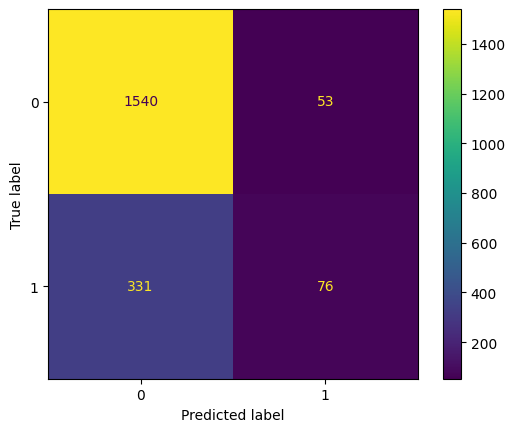

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    log_model, X_test, y_test
)
plt.show()
